# Neural Network (NN)

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Taking the EDA data 
with open('EDA.pickle', 'rb') as data:
    df = pickle.load(data)

In [3]:
#Initial values of dataset
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,mean_d_0_a2,mean_d_1_a2,mean_d_2_a2,mean_d_3_a2,mean_d_4_a2,mean_d_5_a,mean_d_6_a,mean_d_7_a,mean_d_8_a,mean_d_9_a,mean_d_10_a,mean_d_11_a,mean_d_12_a,mean_d_13_a,mean_d_14_a,mean_d_15_a,mean_d_16_a,mean_d_17_a,mean_d_18_a,mean_d_19_a,mean_d_20_a,mean_d_21_a,mean_d_22_a,mean_d_23_a,mean_d_24_a,mean_d_25_a,mean_d_26_a,mean_d_27_a,mean_d_28_a,mean_d_29_a,...,fft_711_b,fft_712_b,fft_713_b,fft_714_b,fft_715_b,fft_716_b,fft_717_b,fft_718_b,fft_719_b,fft_720_b,fft_721_b,fft_722_b,fft_723_b,fft_724_b,fft_725_b,fft_726_b,fft_727_b,fft_728_b,fft_729_b,fft_730_b,fft_731_b,fft_732_b,fft_733_b,fft_734_b,fft_735_b,fft_736_b,fft_737_b,fft_738_b,fft_739_b,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,2.15,29.5,-353.0,14.40,21.5,5.98,30.7,-343.0,14.7,27.9,3.17,32.2,-368.0,15.9,36.4,7.08,28.8,-359.0,17.3,19.6,-3.8300,-1.230,-10.80000,-0.363,-6.41,-1.03,-2.780,14.60,-1.540,-14.900000,...,30.90,-24.4,-24.4,30.90,-442.0,388.0,-197.0,-197.0,388.0,-564.0,500.00,-245.00,-245.00,500.00,-88.8,214.0,-88.8,-88.8,214.0,-606.0,509.000,-261.0,-261.0,509.000,-399.0,374.0,-185.00,-185.00,374.0,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,25.60,32.8,29.6,21.50,17.4,25.50,31.7,31.5,26.2,32.9,31.80,33.1,33.2,28.5,26.8,32.40,34.7,33.8,27.0,14.2,0.0342,1.100,-1.87000,-4.690,-15.40,-6.22,-0.328,-3.53,-6.980,-9.370000,...,-5.99,-19.1,-19.1,-5.99,163.0,-11.0,-10.7,-10.7,-11.0,117.0,-3.93,17.90,17.90,-3.93,112.0,-13.9,25.5,25.5,-13.9,225.0,-0.968,-27.7,-27.7,-0.968,97.4,-19.0,40.70,40.70,-19.0,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,7.75,30.1,-441.0,9.89,25.3,-68.90,25.3,-481.0,-65.4,20.0,79.80,31.0,-408.0,91.9,29.5,18.80,31.1,-335.0,32.2,19.9,76.6000,4.850,39.90000,75.300,5.27,-72.00,-0.843,-33.00,-82.000,-4.200000,...,585.00,-285.0,-285.0,585.00,-94.3,183.0,-110.0,-110.0,183.0,-133.0,200.00,-72.00,-72.00,200.00,-356.0,295.0,-158.0,-158.0,295.0,-251.0,255.000,-95.7,-95.7,255.000,-177.0,159.0,-48.80,-48.80,159.0,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,17.30,32.0,-148.0,20.40,22.8,13.20,31.5,-147.0,16.9,27.7,15.70,30.7,-142.0,20.7,22.8,13.60,32.2,-135.0,21.2,23.8,4.1500,0.556,-0.35400,3.460,-4.96,1.63,1.330,-5.83,-0.298,0.000777,...,249.00,-146.0,-146.0,249.00,359.0,-146.0,13.7,13.7,-146.0,119.0,-7.64,-7.17,-7.17,-7.64,-296.0,316.0,-218.0,-218.0,316.0,322.0,-113.000,38.4,38.4,-113.000,245.0,-61.9,-5.08,-5.08,-61.9,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,26.10,34.3,43.7,23.70,20.6,-3.87,34.1,43.7,-10.0,22.9,59.40,26.7,60.3,64.7,26.9,32.30,30.1,33.6,31.6,27.7,30.0000,0.276,-0.00677,33.700,-2.36,-33.30,7.640,-16.60,-41.100,-6.290000,...,18.30,-11.9,-11.9,18.30,159.0,-18.2,-25.6,-25.6,-18.2,194.0,32.70,-54.50,-54.50,32.70,154.0,26.4,-56.4,-56.4,26.4,252.0,9.940,-37.4,-37.4,9.940,172.0,15.9,-7.25,-7.25,15.9,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [4]:
#Shape of dataset
df.shape

(2132, 2549)

In [5]:
#Lable mapping
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [6]:
#Function for creating train test split
def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [8]:
print('Shape of Training Dataset:',X_train.shape)
print('Shape of Testing Dataset:',X_test.shape)

Shape of Training Dataset: (1492, 2548)
Shape of Testing Dataset: (640, 2548)


In [10]:
#Modeling
Inputs = tf.keras.Input(shape=(X_train.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(Inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

Outputs = tf.keras.layers.Dense(3,activation="softmax")(x)

model = tf.keras.Model(inputs=Inputs, outputs=Outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2548)]            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                163136    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 167,491
Trainable params: 167,491
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
#Model Compiling
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
#fitting the model
history = model.fit(
    X_train,
    y_train,
    validation_split=0.3,
    batch_size=20,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
53/53 [==============================] - 0s 7ms/step - loss: 26890626662400.0000 - accuracy: 0.5316 - val_loss: 81156066246656.0000 - val_accuracy: 0.5312
Epoch 2/50
53/53 [==============================] - 0s 5ms/step - loss: 17585825382400.0000 - accuracy: 0.5182 - val_loss: 47069247045632.0000 - val_accuracy: 0.5603
Epoch 3/50
53/53 [==============================] - 0s 5ms/step - loss: 13383706345472.0000 - accuracy: 0.5307 - val_loss: 21480658173952.0000 - val_accuracy: 0.4955
Epoch 4/50
53/53 [==============================] - 0s 5ms/step - loss: 32715550228480.0000 - accuracy: 0.4856 - val_loss: 165068025102336.0000 - val_accuracy: 0.5134
Epoch 5/50
53/53 [==============================] - 0s 5ms/step - loss: 22641027055616.0000 - accuracy: 0.4962 - val_loss: 3295269617664.0000 - val_accuracy: 0.4554
Epoch 6/50
53/53 [==============================] - 0s 4ms/step - loss: 7003505164288.0000 - accuracy: 0.5144 - val_loss: 76036440064000.0000 - val_accuracy: 0.5536
Epoch

In [30]:
#Prediction 
nn_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

In [31]:
#Train Set Accuracy
model_train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
print("Training Accuracy: {:.3f}%".format(model_train_acc * 100))

Training Accuracy: 45.509%


In [32]:
#Test Set Accuracy
model_test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_test_acc * 100))

Test Accuracy: 40.156%


In [37]:
# Classification report
print("Classification report")
print(classification_report(y_test, nn_pred, target_names=label_mapping.keys()))

Classification report
              precision    recall  f1-score   support

    NEGATIVE       0.67      0.44      0.53       201
     NEUTRAL       0.44      0.05      0.09       231
    POSITIVE       0.33      0.75      0.46       208

    accuracy                           0.40       640
   macro avg       0.48      0.41      0.36       640
weighted avg       0.48      0.40      0.35       640



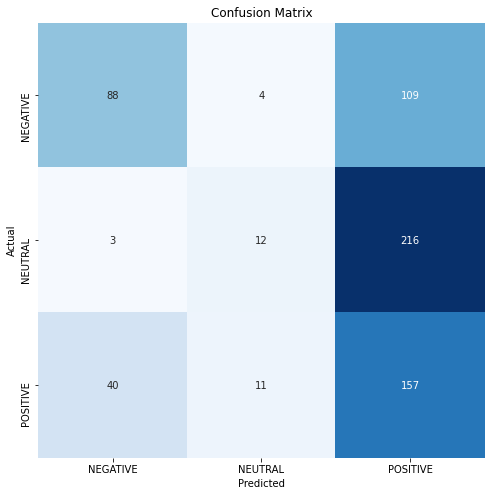

In [41]:
#Plotting the confusion matrix
plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("ConfusionMatrix_NN.png")

In [44]:
#Creating dictionary for storing the accuracy details
d = {
     'Model': 'Neural Network',
     'Training Set Accuracy': model_train_acc,
     'Test Set Accuracy':model_test_acc
}

#Creating Data Frame 
df_models_nn = pd.DataFrame(d, index=[0])

In [45]:
df_models_nn

,Model,Training Set Accuracy,Test Set Accuracy
0,Neural Network,0.455094,0.401563


In [49]:
#Creating pickle files for further use
model.save('../Models/best_nn.h5')
    
with open('../Models/df_models_nn.pickle', 'wb') as output:
    pickle.dump(df_models_nn, output)